In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import zscore

In [2]:
sns.set_style('darkgrid')
pd.set_option.max_rows = 100
pd.set_option.max_columns = 23


In [3]:
df = pd.read_csv('weatherAUS.csv')

In [368]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [369]:
df.shape

(145460, 23)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df_num = [feature for feature in df.columns if df[feature].dtypes != 'O']
df_discrete=[feature for feature in df_num if len(df[feature].unique())<25]
df_cont = [feature for feature in df_num if feature not in df_discrete]
df_cat = [feature for feature in df.columns if feature not in df_num]
print("Numerical Features Count {}".format(len(df_num)))
print("Discrete feature Count {}".format(len(df_discrete)))
print("Continuous feature Count {}".format(len(df_cont)))
print("Categorical feature Count {}".format(len(df_cat)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [7]:
df_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [8]:
df_discrete

['Cloud9am', 'Cloud3pm']

In [9]:
df_cont

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
df_cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [225]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

MinTemp 0.021188284011150468
MaxTemp 0.22083934813407782
Rainfall 9.83622525039533
Evaporation 3.7612860111420643
Sunshine -0.4964800381328167
WindGustSpeed 0.8748788780303394
WindSpeed9am 0.7776295122810298
WindSpeed3pm 0.6282154194116664
Humidity9am -0.48396899459793047
Humidity3pm 0.03361436764166918
Pressure9am -0.09552363669451734
Pressure3pm -0.04562140480119886
Cloud9am -0.229081832248417
Cloud3pm -0.22638434607149094
Temp9am 0.08853999659506906
Temp3pm 0.2379603639909972


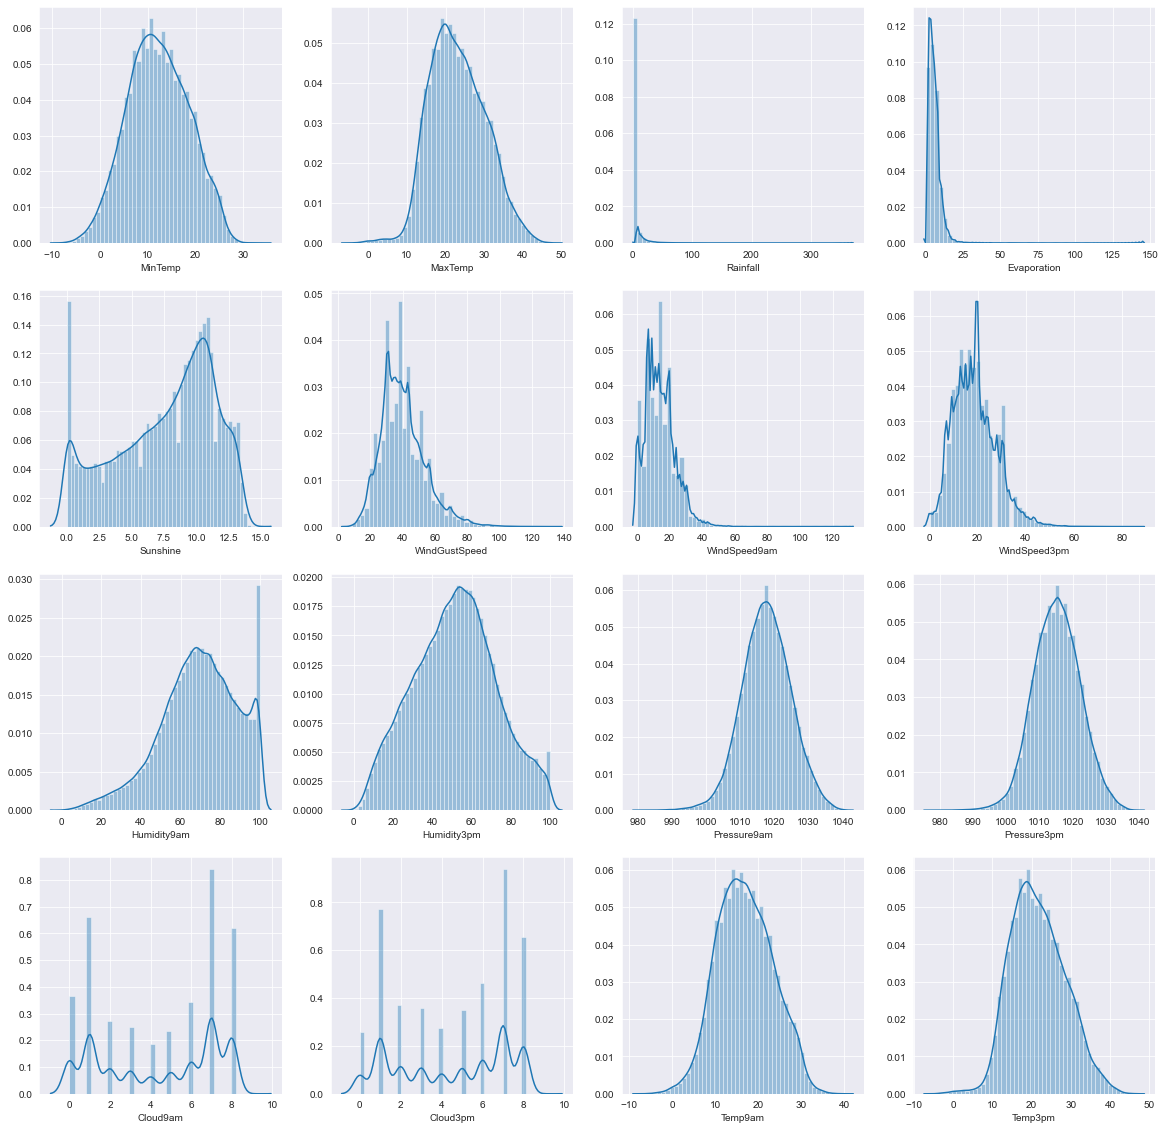

<Figure size 432x288 with 0 Axes>

In [11]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    if df[col].isnull().sum() > 0:
        print(col, df[col].skew())
        plt.subplot(4,4,i)
        sns.distplot(df[col])
        i = i+1
plt.show()
plt.tight_layout()
    

In [12]:
## random imputation for features with more than 20% null values

def randomimpu(col):
    random = df[col].dropna().sample(df[col].isnull().sum())
    random.index = df[df[col].isnull()][col].index
    df.loc[df[col].isnull(),col] = random

In [13]:
randomimpu('Evaporation')
randomimpu('Sunshine')
randomimpu('Cloud9am')
randomimpu('Cloud3pm')



In [14]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [15]:
for col in df_num:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > abs(0.5):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())


In [16]:
df[df_cat].isnull().sum() / len(df) * 100

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

In [17]:
for col in df_cat:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.4,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,1.6,10.7,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,2.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.4,11.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,9.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,8.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,1.8,4.3,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


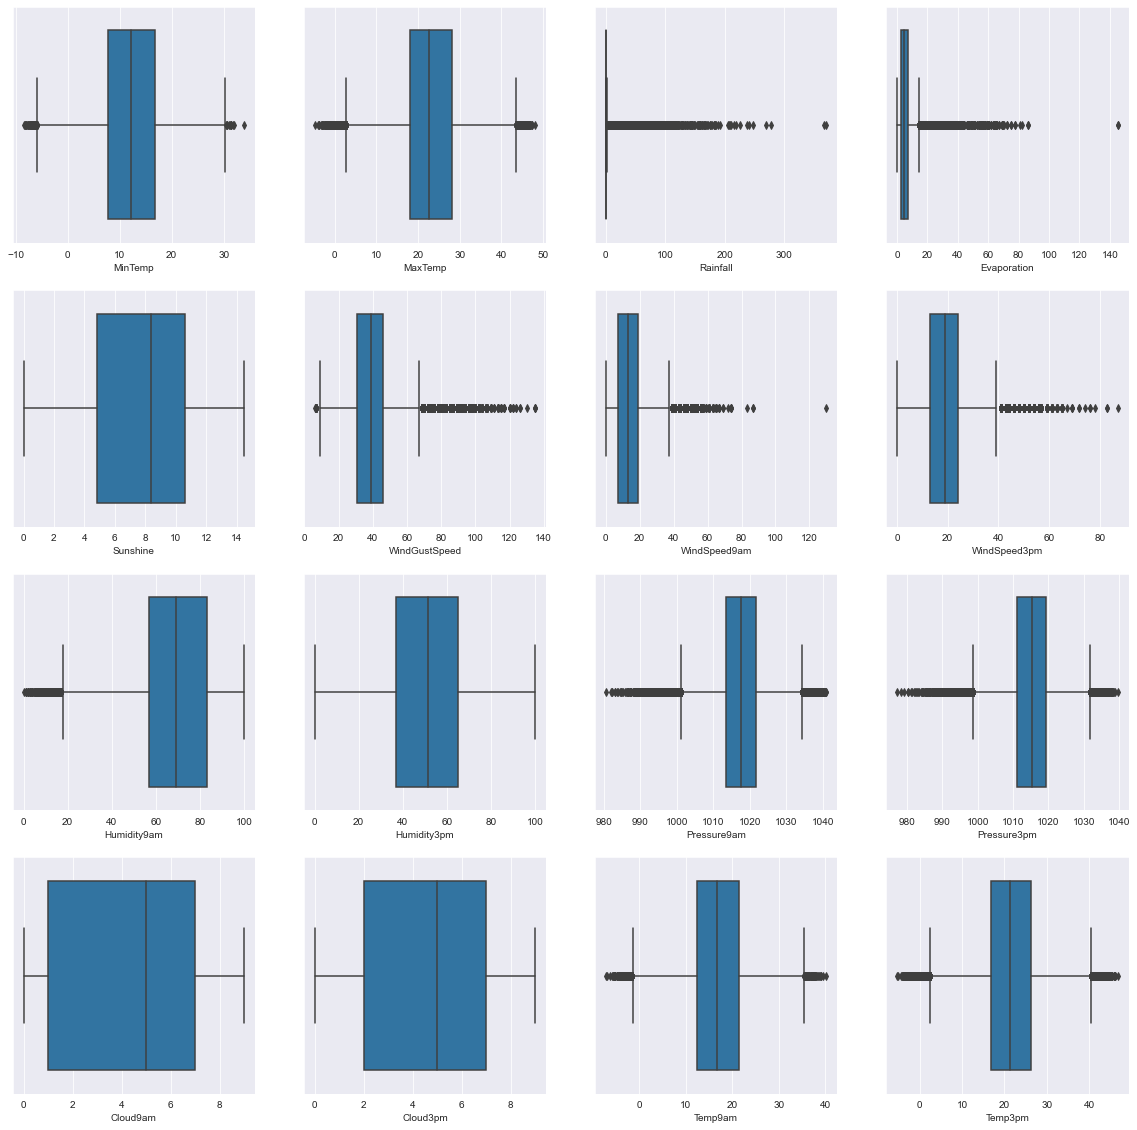

<Figure size 432x288 with 0 Axes>

In [210]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [20]:
for col in df_num:
    df[col]  = df[col].clip(lower = df[col].quantile(0.025),upper=df[col].quantile(0.975))

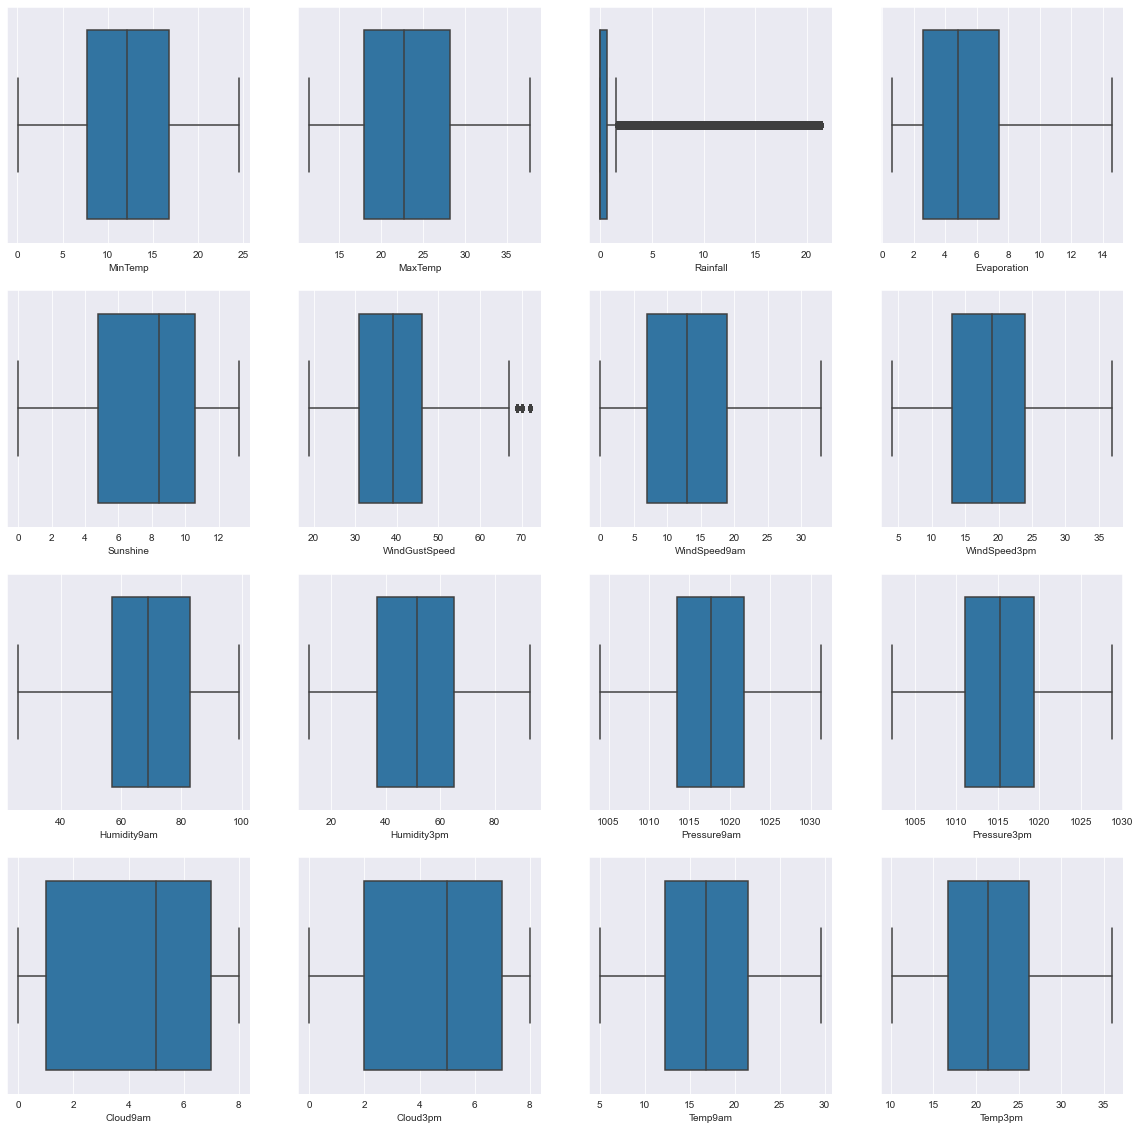

<Figure size 432x288 with 0 Axes>

In [212]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [237]:
df[df_num].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.731418,0.097911,0.305920,0.036765,0.176369,0.178620,0.178518,-0.227245,0.012325,-0.438287,-0.447281,0.048248,0.014978,0.897896,0.697383
MaxTemp,0.731418,1.000000,-0.138923,0.382334,0.243589,0.073988,0.021904,0.052939,-0.490983,-0.488728,-0.331538,-0.421885,-0.179408,-0.166555,0.880484,0.970175
Rainfall,0.097911,-0.138923,1.000000,-0.068781,-0.146776,0.149540,0.093476,0.066434,0.298122,0.322005,-0.187960,-0.127373,0.169207,0.141070,-0.027844,-0.143574
Evaporation,0.305920,0.382334,-0.068781,1.000000,0.185325,0.128656,0.118841,0.084803,-0.312672,-0.239717,-0.192856,-0.209463,-0.099510,-0.097005,0.360549,0.370473
Sunshine,0.036765,0.243589,-0.146776,0.185325,1.000000,-0.013890,0.003346,0.032174,-0.250733,-0.322154,0.019458,-0.015426,-0.302083,-0.309942,0.152160,0.257141
WindGustSpeed,0.176369,0.073988,0.149540,0.128656,-0.013890,1.000000,0.574955,0.656980,-0.210737,-0.028033,-0.418817,-0.375211,0.037880,0.057003,0.147947,0.040149
WindSpeed9am,0.178620,0.021904,0.093476,0.118841,0.003346,0.574955,1.000000,0.502369,-0.276693,-0.034732,-0.210121,-0.160854,0.012144,0.028245,0.132504,0.012165
WindSpeed3pm,0.178518,0.052939,0.066434,0.084803,0.032174,0.656980,0.502369,1.000000,-0.146511,0.019065,-0.272652,-0.232911,0.030968,0.010547,0.166878,0.031693
Humidity9am,-0.227245,-0.490983,0.298122,-0.312672,-0.250733,-0.210737,-0.276693,-0.146511,1.000000,0.655335,0.134138,0.179307,0.284637,0.214673,-0.459173,-0.483396
Humidity3pm,0.012325,-0.488728,0.322005,-0.239717,-0.322154,-0.028033,-0.034732,0.019065,0.655335,1.000000,-0.022524,0.053899,0.315770,0.316960,-0.204609,-0.545527


In [21]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df[df_num], 0.6)
len(set(corr_features))

6

In [23]:
corr_features

{'Humidity3pm', 'MaxTemp', 'Pressure3pm', 'Temp3pm', 'Temp9am', 'WindSpeed3pm'}

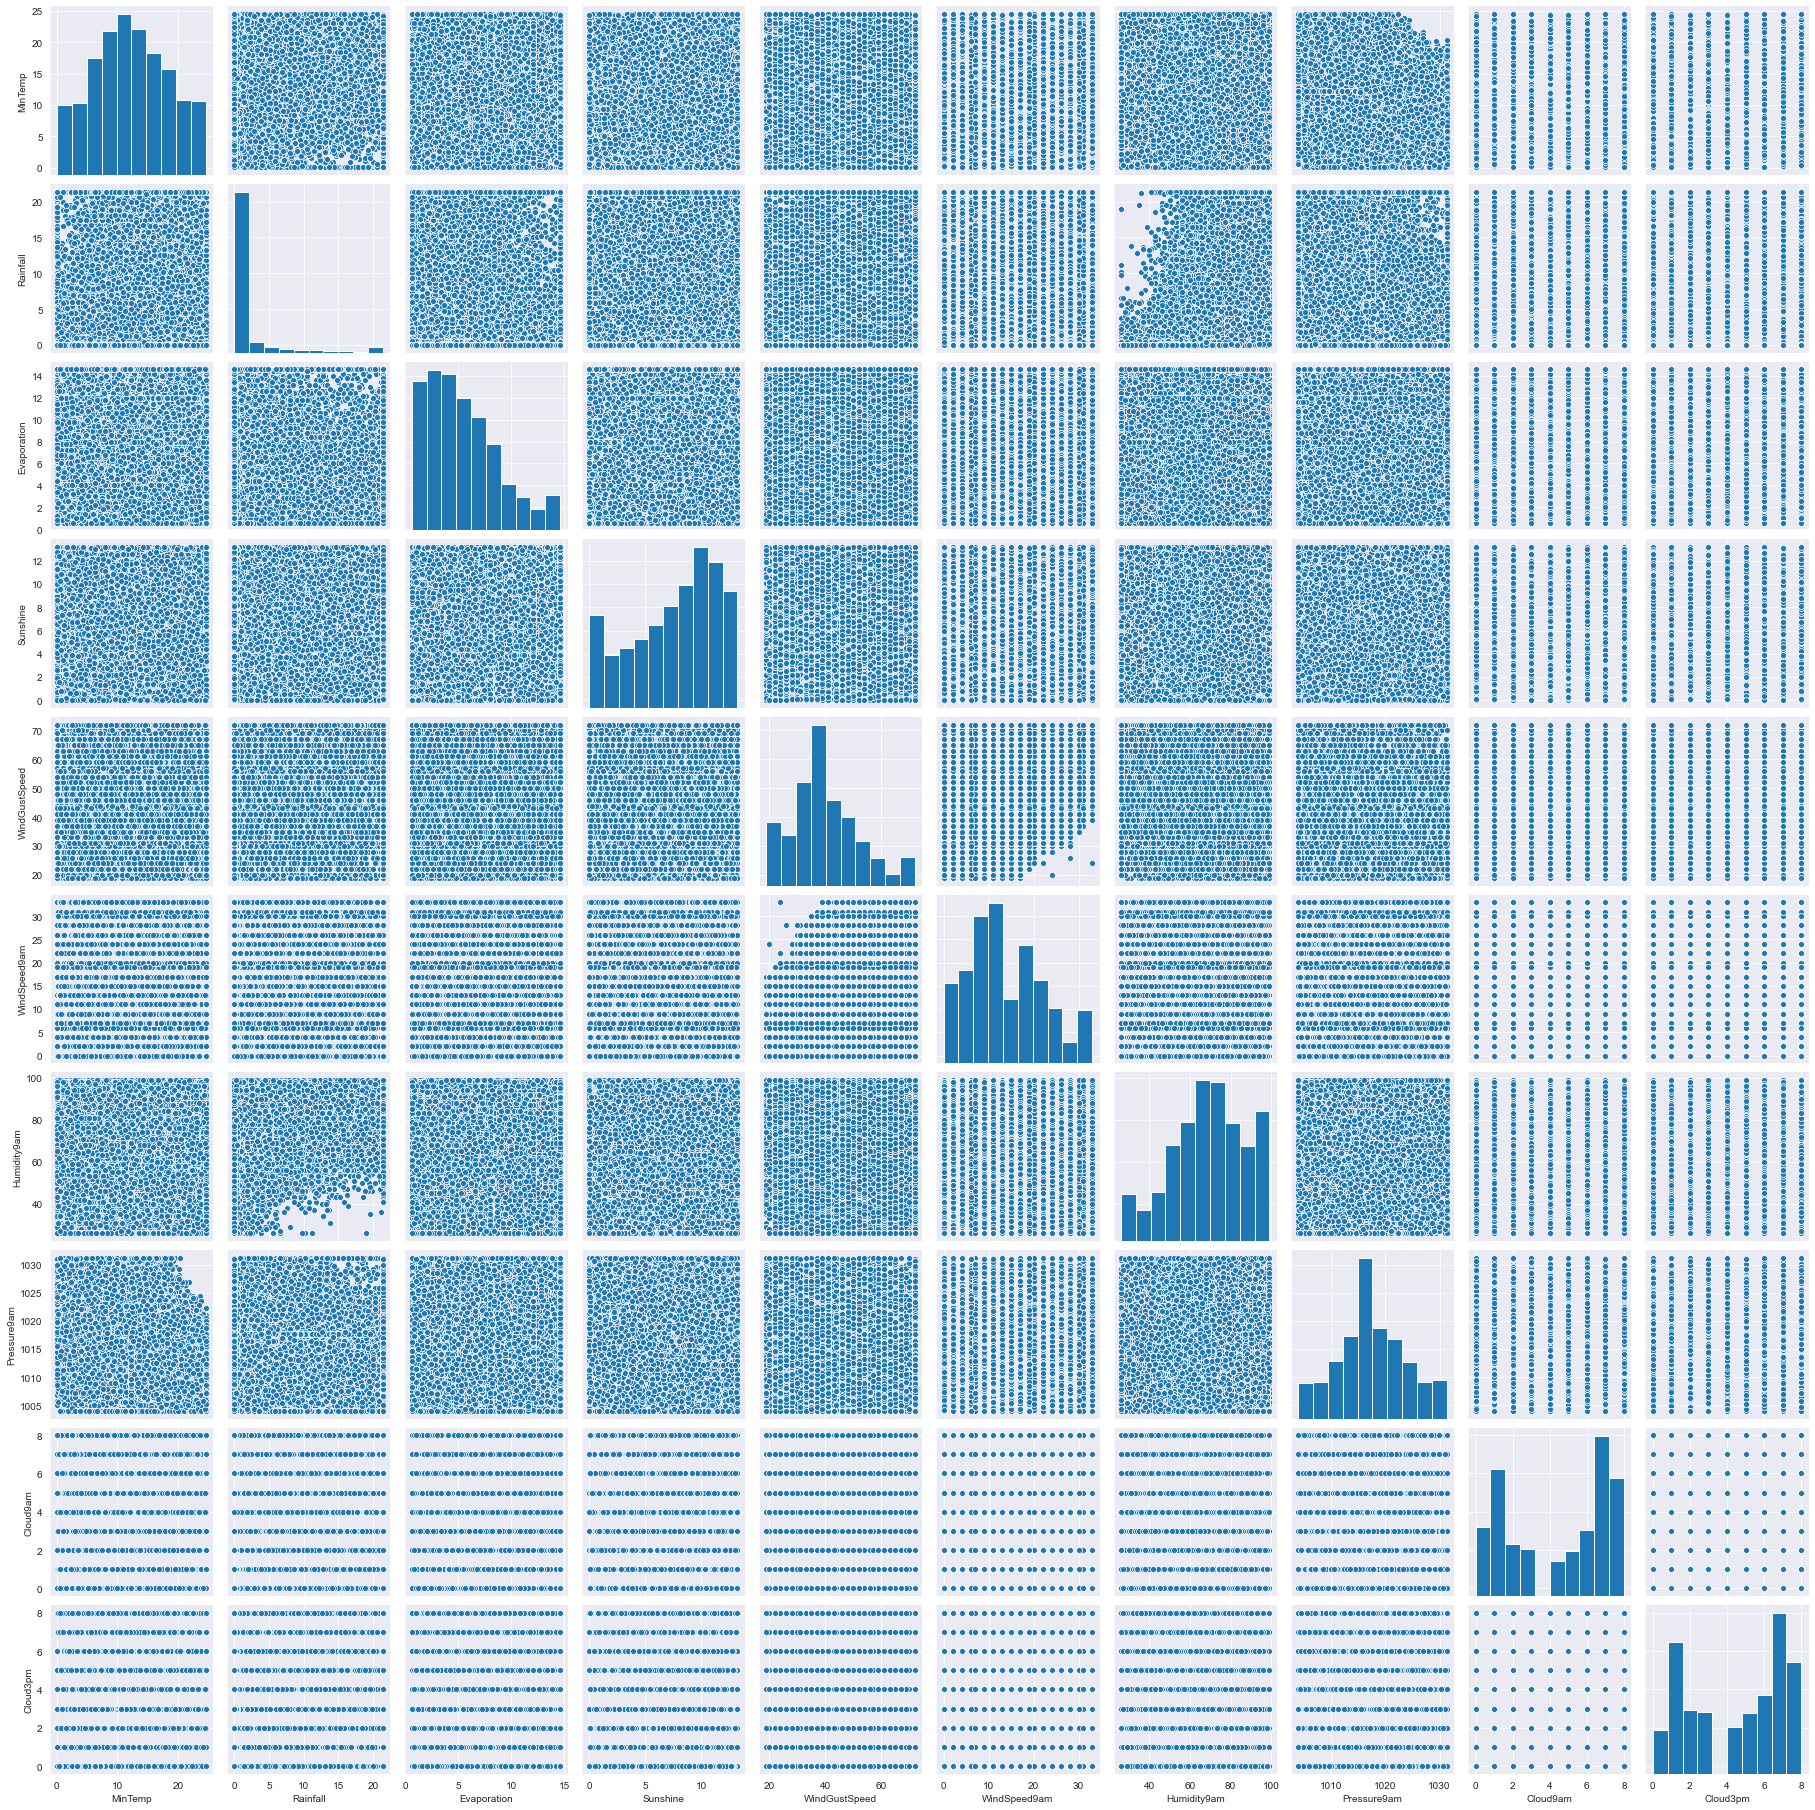

In [241]:
sns.pairplot(df[df_num].drop(corr_features, axis = 1))

In [24]:
df = df.drop(corr_features, axis = 1)

In [25]:
corr_features

{'Humidity3pm', 'MaxTemp', 'Pressure3pm', 'Temp3pm', 'Temp9am', 'WindSpeed3pm'}

In [26]:
for feat in corr_features:
    df_num.remove(feat)

In [27]:
for feat in corr_features:
    df_cont.remove(feat)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df_num


vif['VIF'] = [variance_inflation_factor(df[df_num].values,i) for i in range(df[df_num].shape[1])]

vif

,Features,VIF
0,MinTemp,5.764205
1,Rainfall,1.389696
2,Evaporation,4.150229
3,Sunshine,6.091092
4,WindGustSpeed,17.661516
5,WindSpeed9am,5.893173
6,Humidity9am,22.965965
7,Pressure9am,56.942094
8,Cloud9am,4.202873
9,Cloud3pm,4.537658


## Feature selection with anova

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [30]:
X = df[df_num]
y = df['RainTomorrow']

In [31]:
fs = SelectKBest(score_func=f_classif, k=7)
fs.fit_transform(X, y)
fs.scores_

array([  977.83808452, 14234.31903056,   851.32734541,  8357.90632739,
        7342.37557851,  1015.03812541, 10039.33192243,  7872.12482399,
        5724.29582744,  8206.26640073])

In [32]:
fs.pvalues_

array([6.07436781e-214, 0.00000000e+000, 1.29760389e-186, 0.00000000e+000,
       0.00000000e+000, 5.65637634e-222, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [33]:
cols = pd.DataFrame()
cols['Feature'] = df_num
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
1,Rainfall,14234.319031,0.000000e+00
6,Humidity9am,10039.331922,0.000000e+00
3,Sunshine,8357.906327,0.000000e+00
9,Cloud3pm,8206.266401,0.000000e+00
7,Pressure9am,7872.124824,0.000000e+00
4,WindGustSpeed,7342.375579,0.000000e+00
8,Cloud9am,5724.295827,0.000000e+00
5,WindSpeed9am,1015.038125,5.656376e-222
0,MinTemp,977.838085,6.074368e-214
2,Evaporation,851.327345,1.297604e-186


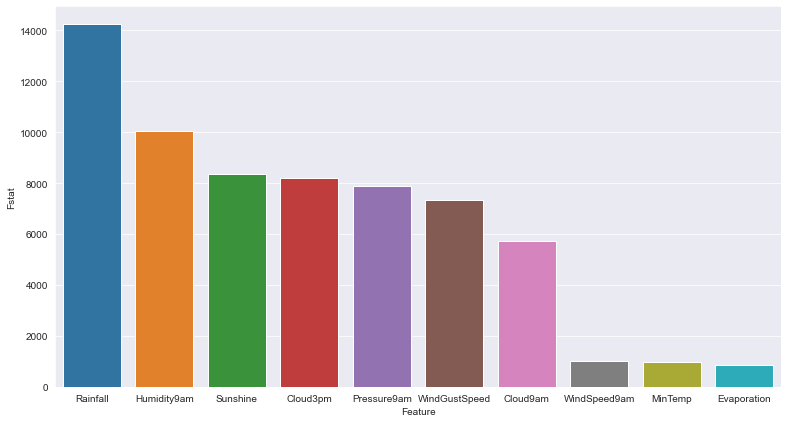

In [34]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [35]:
fs.get_support(indices = True)

array([1, 3, 4, 6, 7, 8, 9], dtype=int64)

In [36]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Pressure9am',
       'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [37]:
for col in df_num:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)

In [38]:
df.drop('Date', axis = 1, inplace = True)
df_cat.remove('Date')

In [39]:
for feat in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df1 = df.groupby(feat)['RainTomorrow'].value_counts().unstack().iloc[:,1].sort_values(ascending= False)
    mydict = { j:i for i,j in (enumerate(df1.index,1))}
    df[feat] = df[feat].replace(mydict)


In [40]:
mydict = {'Yes':1, 'No':0}
df['RainToday'] = df['RainToday'].replace(mydict)
df['RainTomorrow'] = df['RainTomorrow'].replace(mydict)


In [41]:
df.head()

,Location,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,30,0.6,0.0,1,44.0,4,4,71.0,1007.7,8.0,8.0,0,0
1,30,0.0,10.7,4,44.0,2,7,44.0,1010.6,2.0,1.0,0,0
2,30,0.0,11.0,5,46.0,4,7,38.0,1007.6,4.0,2.0,0,0
3,30,0.0,9.0,14,24.0,13,14,45.0,1017.6,8.0,8.0,0,0
4,30,1.0,4.3,1,41.0,14,5,82.0,1010.8,7.0,8.0,0,0


In [42]:
df[df_cat]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,30,1,4,4,0,0
1,30,4,2,7,0,0
2,30,5,4,7,0,0
3,30,14,13,14,0,0
4,30,1,14,5,0,0
...,...,...,...,...,...,...
145455,49,13,13,16,0,0
145456,49,8,13,3,0,0
145457,49,2,13,4,0,0
145458,49,11,11,3,0,0


In [43]:
X = df[df_cat].drop('RainTomorrow',1)
y = df['RainTomorrow']

In [44]:
fs = SelectKBest(score_func=chi2, k=3)
fs.fit_transform(X, y)
fs.scores_

array([25247.05782954,  3151.70900694,  4401.44860184,  1515.52817148,
       10617.40077203])

In [45]:
fs.pvalues_

array([0., 0., 0., 0., 0.])

In [46]:
cols = pd.DataFrame()
cols['Feature'] = df[df_cat].drop('RainTomorrow',1).columns
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
0,Location,25247.057830,0.0
4,RainToday,10617.400772,0.0
2,WindDir9am,4401.448602,0.0
1,WindGustDir,3151.709007,0.0
3,WindDir3pm,1515.528171,0.0


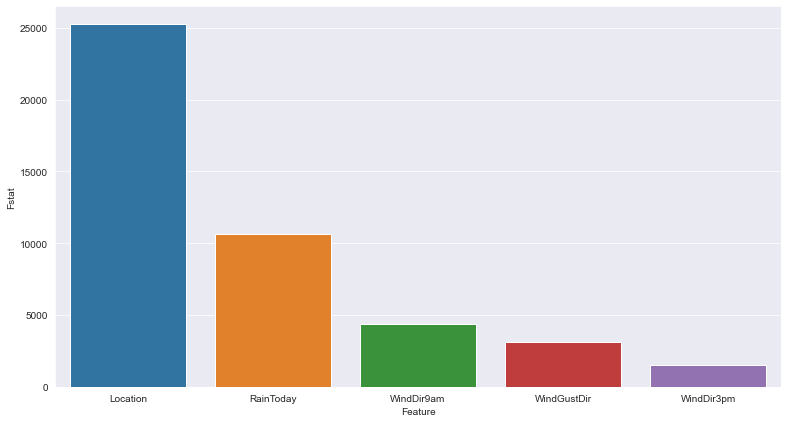

In [47]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [48]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['Location', 'WindDir9am', 'RainToday'], dtype='object')

In [49]:
df_cat.remove('RainTomorrow')


In [50]:
for col in df_cat:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)
   

In [51]:
for col in ['Rainfall','Sunshine','WindGustSpeed','WindDir9am','Humidity9am','Pressure9am','Cloud9am','Cloud3pm']:
    df[col] = stats.zscore(df[col])

In [52]:
df.head()

,Location,Rainfall,Sunshine,WindGustSpeed,WindDir9am,Humidity9am,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,30,-0.262957,-2.012766,0.339723,-0.771065,0.106384,-1.571696,1.231132,1.283390,0,0
1,30,-0.395541,0.819358,0.339723,-1.176667,-1.366888,-1.115050,-0.845737,-1.290854,0,0
2,30,-0.395541,0.898763,0.502630,-0.771065,-1.694282,-1.587443,-0.153447,-0.923104,0,0
3,30,-0.395541,0.369394,-1.289349,1.054147,-1.312322,-0.012799,1.231132,1.283390,0,0
4,30,-0.174568,-0.874623,0.095362,1.256948,0.706606,-1.083557,0.884987,1.283390,0,0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df.drop('RainTomorrow', 1)
y = df['RainTomorrow']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [58]:
models = [LogisticRegression(),DecisionTreeClassifier(), RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),GaussianNB()]

In [59]:
def base_models(model,X_train, X_test, y_train, y_test):
    ml_model = model.fit(X_train,y_train)
    
    y_pred = ml_model.predict(X_test)
    
    print(f' MODEL : {model}')
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n\n')

In [430]:
for model in models:
    base_models(model,X_train, X_test, y_train, y_test)

 MODEL : LogisticRegression()
[[32371  1727]
 [ 6257  3283]]
0.8170401943260461
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     34098
           1       0.66      0.34      0.45      9540

    accuracy                           0.82     43638
   macro avg       0.75      0.65      0.67     43638
weighted avg       0.80      0.82      0.79     43638




 MODEL : DecisionTreeClassifier()
[[28286  5812]
 [ 5291  4249]]
0.7455657912828269
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     34098
           1       0.42      0.45      0.43      9540

    accuracy                           0.75     43638
   macro avg       0.63      0.64      0.63     43638
weighted avg       0.75      0.75      0.75     43638




 MODEL : RandomForestClassifier()
[[32307  1791]
 [ 5864  3676]]
0.8245794949356066
              precision    recall  f1-score   support

           0       0.85      0.95    

C:\Users\win10\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 MODEL : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[[32177  1921]
 [ 5442  4098]]
0.831270910674183
              precision    recall  f1-score   supp

In [60]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\n\n')

[[32256  1842]
 [ 5809  3731]]
0.8246711581649021
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     34098
           1       0.67      0.39      0.49      9540

    accuracy                           0.82     43638
   macro avg       0.76      0.67      0.69     43638
weighted avg       0.81      0.82      0.81     43638






In [65]:
from sklearn.model_selection import GridSearchCV

grid = {'max_depth' : [10,15,20,25,30],
'min_samples_leaf' : [10,20,30,40,50],
'max_samples' : [0.2,0.4,0.6,0.8],
'max_features' : ['auto', 'sqrt', 'log2'],
'criterion' : ["gini", "entropy"] }



In [66]:
rf_model = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=rf_model, param_grid=grid,cv = 3, n_jobs=-1,scoring='accuracy')
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [69]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'max_samples': 0.8,
 'min_samples_leaf': 10}

In [70]:
rf_model = RandomForestClassifier(criterion = 'gini', max_depth= 30, max_features = 'log2', max_samples = 0.8, min_samples_leaf = 10)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\n\n')

[[32467  1631]
 [ 5996  3544]]
0.8252211375406756
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     34098
           1       0.68      0.37      0.48      9540

    accuracy                           0.83     43638
   macro avg       0.76      0.66      0.69     43638
weighted avg       0.81      0.83      0.80     43638






In [62]:
final_model= XGBClassifier().fit(X_train,y_train)
    
y_pred = final_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\n\n')

[09:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[32167  1931]
 [ 5438  4102]]
0.8311334158302397
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     34098
           1       0.68      0.43      0.53      9540

    accuracy                           0.83     43638
   macro avg       0.77      0.69      0.71     43638
weighted avg       0.82      0.83      0.82     43638




